# Laboratorio 03: Raíces.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Juan José Bustamante Guiral
*Métodos computacionales 2025-I*

---

# 1

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$

1 de abril 1986 M = 0.011176 radianes


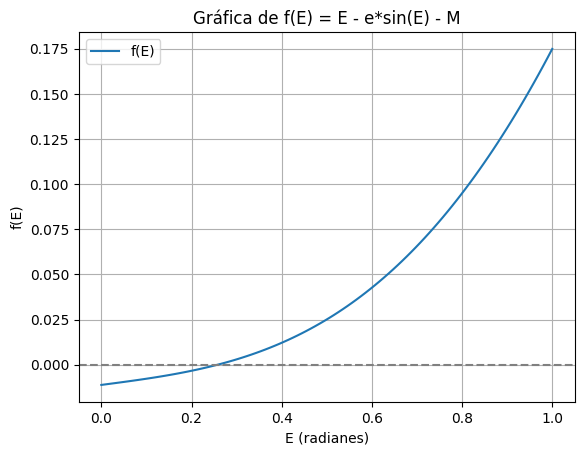

1 de abril 1986, E = 0.257554 radianes


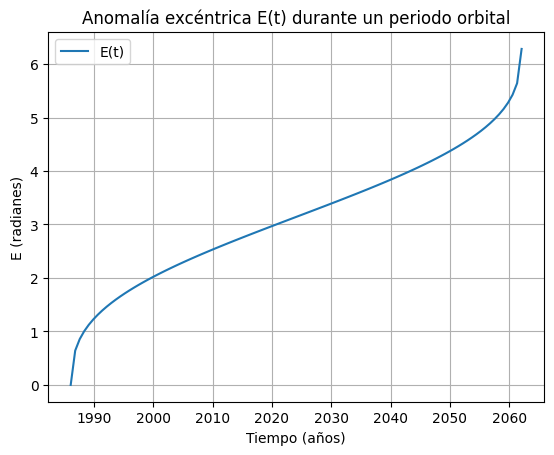

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

e = 0.9672671         # excentricidad
T = 75.96000          # período orbital (años)
t0 = 1986.1113        # paso por el perihelio (febrero 9 de 1986)


t_abril1 = 1986 + 90 / 365.25 # 31 días de enero + 28 de febrero + 31 de marzo = 90 días hasta el 1 de abril
M = 2 * np.pi / T * (t_abril1 - t0)
print(f"1 de abril 1986 M = {M:.6f} radianes")

E = np.linspace(0, 1, 100) #Grafica
f_E = E - e * np.sin(E) - M

plt.plot(E, f_E, label="f(E)")
plt.axhline(0, color='gray', linestyle='--')
plt.title("Gráfica de f(E) = E - e*sin(E) - M")
plt.xlabel("E (radianes)")
plt.ylabel("f(E)")
plt.grid()
plt.legend()
plt.show()

def f(E):
    return E - e * np.sin(E) - M

def f_prime(E):
    return 1 - e * np.cos(E)
E_april1 = newton(f, x0=M, fprime=f_prime)
print(f"1 de abril 1986, E = {E_april1:.6f} radianes")

N = 100                           # Número de puntos
dt = T / N                       # Paso en años
tiempo = np.array([t0 + i * dt for i in range(N + 1)])
M_t = 2 * np.pi / T * (tiempo - t0)

E_t = []
for M_i in M_t:
    def f(E):
        return E - e * np.sin(E) - M_i
    def f_prime(E):
        return 1 - e * np.cos(E)
    E_i = newton(f, x0=M_i, fprime=f_prime)
    E_t.append(E_i)

plt.plot(tiempo, E_t, label="E(t)")
plt.title("Anomalía excéntrica E(t) durante un periodo orbital")
plt.xlabel("Tiempo (años)")
plt.ylabel("E (radianes)")
plt.grid()
plt.legend()
plt.show()


# 2
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

$$
m(T) = \tanh\left( \frac{m(T)}{T} \right)
$$

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

- La magnetización reducida empleando el metodo de la secante y Newton-Raphson (Muestre su resultado con 4 cifras).

- Valide su respuestado con el metodo de punto fijo (Muestre su resultado con 4 cifras).

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

Newton-Raphson (T=0.5): 0.9575
Secante (T=0.5): 0.9575
Punto fijo (T=0.5): 0.9575


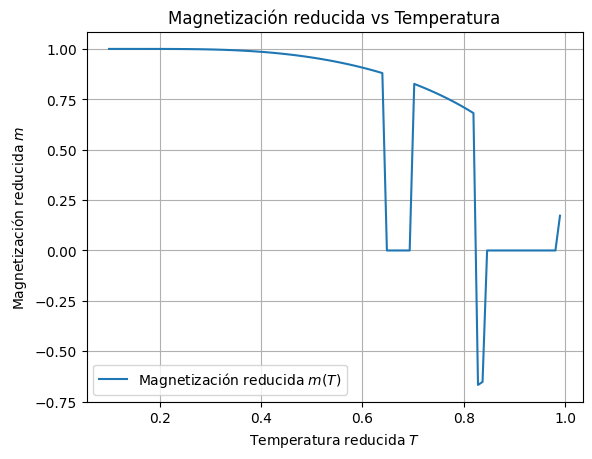

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, root_scalar

T = 0.5


def f(m):
    '''
    Función f(m) = m - tanh(m/T)
    '''
    return m - np.tanh(m / T)

def df(m):
    '''
    Derivada de f(m)
    '''
    return 1 - (1 / T) * (1 / np.cosh(m / T))**2

# Newton-Raphson
m_newton = newton(f, x0=0.5, fprime=df)
print(f"Newton-Raphson (T=0.5): {m_newton:.4f}")

# Secante
secante = root_scalar(f, method='secant', x0=0.1, x1=0.9)
m_secante = secante.root
print(f"Secante (T=0.5): {m_secante:.4f}")

# Punto fijo
def punto_fijo(T, tol=1e-6, max_iter=100):
    m = 0.5
    for i in range(max_iter):
        m_nuevo = np.tanh(m / T)
        if abs(m_nuevo - m) < tol:
            return m_nuevo
        m = m_nuevo
    return m

m_fp = punto_fijo(T)
print(f"Punto fijo (T=0.5): {m_fp:.4f}")

# Gráfico usando método de la secante
T_val = np.linspace(0.1, 0.99, 100)
m_val = []

for T in T_val:
    def f_T(m):
        '''
        Función f(m) = m - tanh(m/T)
        '''
        return m - np.tanh(m / T)

    sol = root_scalar(f_T, method='secant', x0=0.1, x1=0.9)
    m_val.append(sol.root)

plt.plot(T_val, m_val, label='Magnetización reducida $m(T)$')
plt.xlabel('Temperatura reducida $T$')
plt.ylabel('Magnetización reducida $m$')
plt.title('Magnetización reducida vs Temperatura')
plt.grid()
plt.legend()
plt.show()


# 3

La energía libre de Gibbs para 1 mol de hidrógeno a una temperatura $T$ está dada por:

$$G = -RT \ln \left[ \left( \frac{T}{T_0} \right)^{5/2} \right]$$

donde:  
- $ R = 8.314 \, \text{J/K} $ es la constante de los gases.  
- $ T_0 = 4.444 \, \text{J/K} $ es una constante de referencia.  

Determinar la temperatura $ T $ a la cual $ G = -10^5 \, \text{J}$.  



In [ ]:
import numpy as np
from scipy.optimize import fsolve

R = 8.314
T0 = 4.444
G = -1e5
def ecuacion(T):
    '''
    Ecuacion de gibbs
    '''
    return -R * T * (5/2) * np.log(T / T0) - G
T_aproximada = 200
T = fsolve(ecuacion, T_aproximada)[0] #Metodo para resolver ecuacion, se podria hacer tambien con algun metodo como newton raphson
print(f"La temperatura T que satisface G = -10^5 J es aproximadamente {T:.2f} K")

La temperatura T que satisface G = -10^5 J es aproximadamente 904.97 K


# 4

La distribución de intensidad en la difracción de Fraunhofer por una rendija de ancho $W$ y altura infinita, iluminada con luz monocromática de longitud de onda $\lambda$, está dada por:

$$I(\theta) = I_0 \left[ \frac{\sin(\pi W \sin \theta / \lambda)}{\pi W \sin \theta / \lambda} \right]^2,$$

donde $\theta$ es el ángulo de observación respecto a la dirección incidente. Introduciendo la variable adimensional:

$$x = \pi W \sin \theta / \lambda,$$

la intensidad y su derivada se expresan como:

$$I(x) = I_0 \left( \frac{\sin x}{x} \right)^2, \quad I(0) = I_0,$$
$$I'(x) = \frac{2I_0}{x} \left( \cos x - \frac{\sin x}{x} \right) \frac{\sin x}{x}, \quad I'(0) = 0.$$

- Graficar $I(x)$ y $I'(x)$ en el intervalo $x \in [-10, 10]$.

- Calcular el valor $x_{1/2}$ (positivo) donde $I(x) = I_0/2$, resolviendo la ecuación $I(x) - I_0/2 = 0$ con el método de la secante y aproximación inicial $x_0 = \pi$.

- Encontrar los máximos locales $x_i \in [-10, 10]$ resolviendo $I'(x) = 0$.  
- Usar un paso $h = 0.5$ para separar raíces y aplicar el *método de la regula falsi* (falsa posición) para mantenerlas acotadas.

**Nota:**  
Puede tomar $I_0=1$.

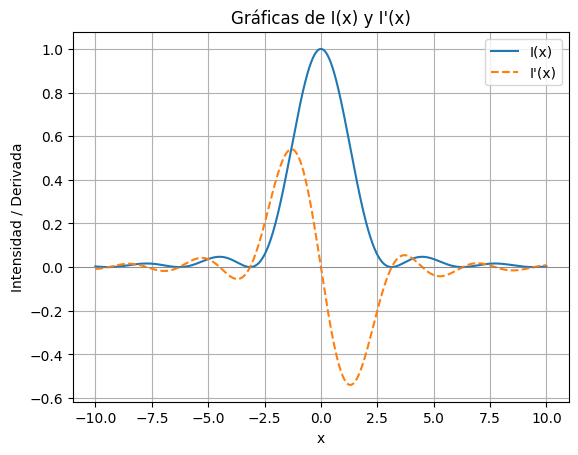


Valor de x donde I(x) = 0.5 (x_1/2):

Máximos locales de I(x):
x = -9.42477798, I(x) = 0.00000000
x = -7.72525188, I(x) = 0.01648003
x = -6.28318541, I(x) = 0.00000000
x = -4.49340946, I(x) = 0.04719045
x = -3.14159267, I(x) = 0.00000000
x = 0.00000000, I(x) = 1.00000000
x = 3.14159267, I(x) = 0.00000000
x = 4.49340946, I(x) = 0.04719045
x = 6.28318541, I(x) = 0.00000000
x = 7.72525188, I(x) = 0.01648003
x = 9.42477798, I(x) = 0.00000000


In [9]:
import numpy as np
import matplotlib.pyplot as plt


def I(x):
    '''
    funciones I(x)
    '''
    if x == 0:
        return 1  # I(0) = I0 = 1
    else:
        return (np.sin(x) / x)**2

def I_prime(x):
    '''
    Derivada de I(x)
    '''
    if x == 0:
        return 0
    else:
        return (2 / x) * (np.cos(x) - np.sin(x)/x) * (np.sin(x)/x)


x_vals = np.linspace(-10, 10, 1000)
I_vals = [I(x) for x in x_vals]
I_prime_vals = [I_prime(x) for x in x_vals]

plt.plot(x_vals, I_vals, label="I(x)")
plt.plot(x_vals, I_prime_vals, label="I'(x)", linestyle='--')
plt.axhline(0, color='gray', linewidth=0.5)
plt.title("Gráficas de I(x) y I'(x)")
plt.xlabel("x")
plt.ylabel("Intensidad / Derivada")
plt.legend()
plt.grid()
plt.show()


def metodo_secante(f, x0, x1, tol=1e-8, max_iter=100):
    for i in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)
        if fx1 - fx0 == 0:
            return None
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        if abs(x2 - x1) < tol:
            return x2
        x0, x1 = x1, x2
    return None

# Definir función f(x) = I(x) - 0.5
def f_secante(x):
    return I(x) - 0.5

x0 = np.pi
x1 = np.pi + 0.2
x_medio = metodo_secante(f_secante, x0, x1)

print(f"\nValor de x donde I(x) = 0.5 (x_1/2):")


# Método de la regula falsi para I'(x) = 0
def regula_falsi(f, a, b, tol=1e-8, max_iter=100):
    fa = f(a)
    fb = f(b)
    if fa * fb > 0:
        return None
    for i in range(max_iter):
        c = b - fb * (b - a) / (fb - fa)
        fc = f(c)
        if abs(fc) < tol:
            return c
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
    return None

# Buscar máximos locales resolviendo I'(x) = 0 en [-10, 10]
h = 0.5
x_iniciales = np.arange(-10, 10, h)
maximos_locales = []

for i in range(len(x_iniciales) - 1):
    a = x_iniciales[i]
    b = x_iniciales[i+1]
    raiz = regula_falsi(I_prime, a, b)
    if raiz is not None:
        # Verificar que no esté muy cerca de una raíz ya encontrada
        muy_cerca = False
        for r in maximos_locales:
            if abs(raiz - r) < 1e-4:
                muy_cerca = True
                break
        if not muy_cerca:
            maximos_locales.append(raiz)

# Ordenar y mostrar resultados
maximos_locales.sort()
print("\nMáximos locales de I(x):")
for x in maximos_locales:
    print(f"x = {x:.8f}, I(x) = {I(x):.8f}")


# 5

La ley de Planck describe la densidad espectral de energía de la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico (Toda et al., 1998):

$$u(\lambda,T)=\frac{8\pi hc}{\lambda^{5}}\,\frac{1}{\exp\left(hc/\left(\lambda k_{B}T\right)\right)-1},$$

donde:
- $T$ = temperatura de equilibrio (K)
- $\lambda$ = longitud de onda (m)
- $h=6.626 \times 10^{-34}$ J $\cdot$ s (constante de Planck)
- $k_{B}=1.381 \times 10^{-23}$ J$\cdot$K$^{-1}$ (constante de Boltzmann)
- $c=2.998 \times 10^{8}$ m$\cdot$s$^{-1}$ (velocidad de la luz)

Introduciendo las variables adimensionales:
$$x=\frac{\lambda}{\lambda_{0}}, \quad \lambda_{0}=\frac{hc}{k_{B}T}, \quad K=\frac{8\pi k_{B}T}{\lambda_{0}^{4}},$$

la ley se simplifica a:
$$u(\lambda,T)=K\frac{1}{x^{5}\left(e^{1/x}-1\right)}.$$

La derivada (para encontrar máximos):
$$\frac{\partial u}{\partial\lambda}=K\lambda_{0}\frac{5x+(1-5x)e^{1/x}}{x^{7}(e^{1/x}-1)^{2}}. $$

- Graficar $u(\lambda,T)$ y $\partial u/\partial\lambda$ para $T=4000, 5000, 6000$ K.

- Resolver $\partial u/\partial\lambda=0$ para $T=5778$ K con el método de Bisección y de Newton.

- Validar la ley de desplazamiento de Wien: $\lambda_{\rm max}T \approx 2.898 \times 10^{-3}$ m $\cdot$ K

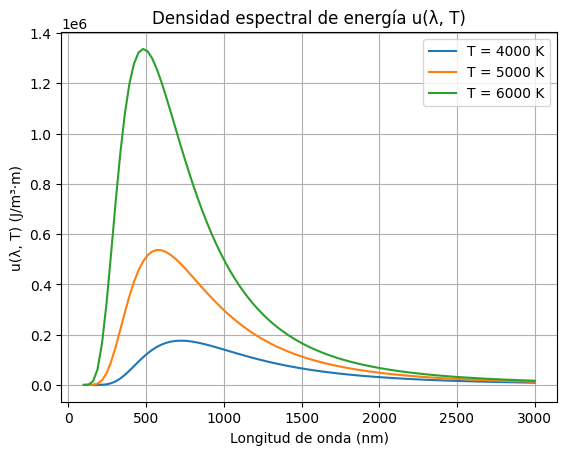

Raíz (bisección): 0.20140523527388726
Raíz (Newton): -3.6652078687371883e+21

Ley de Wien:
λ_max = -9124528966909782.0 m
λ_max * T = -5.272152837080472e+19 m·K
Valor esperado ≈ 2.898e-3 m·K


In [ ]:
#Aquí va su código
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect, newton


h = 6.626e-34      # Constante de Planck (J·s)
kB = 1.381e-23     # Constante de Boltzmann (J/K)
c = 2.998e8        # Velocidad de la luz (m/s)

def u_adimensional(x):
    '''
    Función u(λ, T) adimensionada
    '''
    return 1 / (x**5 * (np.exp(1/x) - 1))

def derivada_adimensional(x):
    '''
    Derivada de u(λ, T) adimensional
    '''
    return
    num = 5*x + (1 - 5*x)*np.exp(1/x)
    den = x**7 * (np.exp(1/x) - 1)**2
    return num / den

def u_lambda_T(lmbda, T):
    '''
    Función u(λ, T) en unidades adimensionales
    '''
    return (8 * np.pi * h * c) / (lmbda**5 * (np.exp(h*c / (lmbda * kB * T)) - 1))

# T = 4000, 5000, 6000 K
lmbdas = np.linspace(1e-7, 3e-6, 100)  # λ desde 100 nm hasta 3000 nm

for T in [4000, 5000, 6000]:
    u_vals = u_lambda_T(lmbdas, T)
    plt.plot(lmbdas * 1e9, u_vals, label=f"T = {T} K")  # λ en nanómetros

plt.title("Densidad espectral de energía u(λ, T)")
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("u(λ, T) (J/m³·m)")
plt.legend()
plt.grid()
plt.show()

# Encontrar el máximo usando la derivada adimensional
# Para T = 5778 K
def f(x):
    '''
    Función f(x) = ∂u/∂λ - 1
    '''
    return 5*x + (1 - 5*x)*np.exp(1/x)

# Bisección
x_bisect = bisect(f, 0.1, 1.0)
# Newton-Raphson
x_newton = newton(f, 0.5)

print("Raíz (bisección):", x_bisect)
print("Raíz (Newton):", x_newton)


# Validar la ley de Wien
T = 5778  # Temperatura del Sol (aprox)
lambda_0 = h * c / (kB * T)           # Escala de longitud de onda
lambda_max = x_newton * lambda_0  # Longitud de onda de máxima emisión

print("\nLey de Wien:")
print("λ_max =", lambda_max, "m")
print("λ_max * T =", lambda_max * T, "m·K")
print("Valor esperado ≈ 2.898e-3 m·K")


# 6

Considere un pozo de potencial cuadrado de ancho $w$, con paredes de altura $V$:

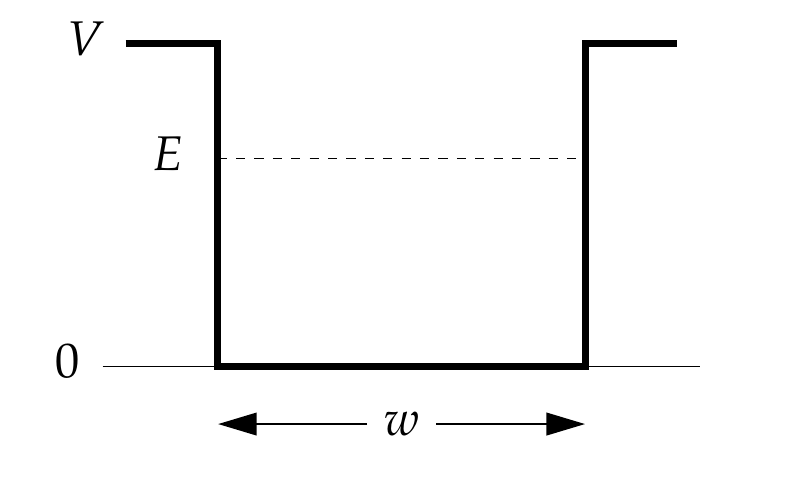

Usando la ecuación de Schrödinger, se puede demostrar que las energías permitidas $E$ de una partícula cuántica de masa $m$ atrapada en el pozo son soluciones de:

$$\tan \sqrt{w^2 m E / 2 \hbar^2} =
\begin{cases}
\sqrt{(V - E) / E} & \text{para los estados pares,} \\
-\sqrt{E / (V - E)} & \text{para los estados impares,}
\end{cases}$$

donde los estados se numeran comenzando desde 0, siendo el estado base el estado 0, el primer estado excitado el estado 1, y así sucesivamente.

- Para un electrón (masa $ 9.11 \times 10^{-31} \, \text{kg} $) en un pozo con $ V = 20 \, \text{eV} $ y $ w = 1 \, \text{nm} $, escriba un programa en Python para graficar las tres cantidades:

$$y_1 = \tan \sqrt{w^2 m E / 2 \hbar^2}, \quad y_2 = \sqrt{\frac{V - E}{E}}, \quad y_3 = -\sqrt{\frac{E}{V - E}},$$

en el mismo gráfico, como función de $ E $ desde $ E = 0 $ hasta $ E = 20 \, \text{eV} $. A partir de su gráfico, haga estimaciones aproximadas de las energías de los primeros seis niveles de energía de la partícula.

- Escriba un segundo programa para calcular los valores de los primeros seis niveles de energía en electrón-voltios con una precisión de $ 0.001 \, \text{eV} $ usando el método de la bisección.

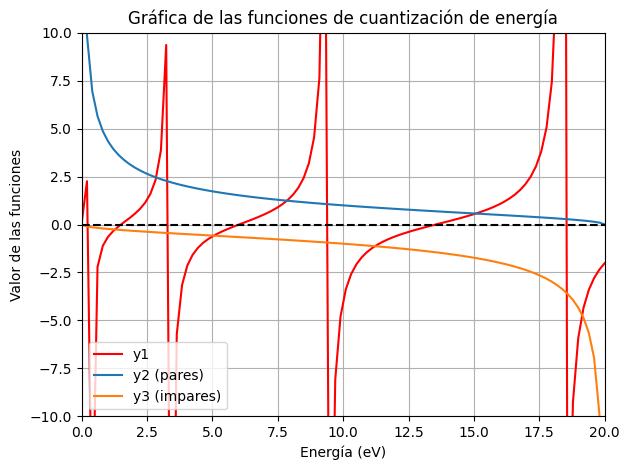

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

hbar = 1.0545718e-34  # Js
m = 9.11e-31  # kg
eV = 1.60218e-19  # J
V0 = 20 * eV  # J
w = 1e-9  # m

# Energía en el rango de 0 a V0 (en J)
E_vals = np.linspace(1e-3 * eV, V0 - 1e-3 * eV, 100)  # evitar división por cero

# Definiciones de las funciones
def y1(E):
    '''
    funcion y1
    '''
    k = np.sqrt(w**2 * m * E / (2 * hbar**2))
    return np.tan(k)

def y2(E):
    '''
    funcion y2
    '''
    return np.sqrt((V0 - E) / E)

def y3(E):
    '''
    funcion y3
    '''
    return -np.sqrt(E / (V0 - E))

# Calcular los valores de las funciones
y1_vals = y1(E_vals)
y2_vals = y2(E_vals)
y3_vals = y3(E_vals)

# Convertir energía a eV para el eje x
E_eV = E_vals / eV

plt.plot(E_eV, y1_vals, 'r', label='y1')
plt.plot(E_eV, y2_vals, label=r'y2 (pares)')
plt.plot(E_eV, y3_vals, label=r'y3 (impares)')
plt.ylim(-10, 10)
plt.xlim(0, 20)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Energía (eV)')
plt.ylabel('Valor de las funciones')
plt.title('Gráfica de las funciones de cuantización de energía')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


# 7

Existe un punto entre la Tierra y la Luna, llamado punto de Lagrange $L_1$, donde un satélite orbitará la Tierra en perfecta sincronía con la Luna, permaneciendo siempre entre ambas. Esto funciona porque la atracción hacia adentro de la Tierra y la atracción hacia afuera de la Luna se combinan para crear exactamente la fuerza centrípeta necesaria que mantiene al satélite en su órbita.

Asumiendo órbitas circulares y que la Tierra es mucho más masiva que la Luna o el satélite, la distancia $r$ desde el centro de la Tierra hasta el punto $L_1$ satisface:

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,$$

donde $M$ y $m$ son las masas de la Tierra y la Luna respectivamente, $G$ es la constante gravitacional de Newton y $ \omega $ es la velocidad angular tanto de la Luna como del satélite.

- La ecuación anterior es una ecuación polinómica de quinto grado en $r$ (también llamada ecuación quíntica). Este tipo de ecuaciones no puede resolverse exactamente en forma cerrada, pero es sencillo resolverlas numéricamente. Escriba un programa que use el método de Newton o el método de la secante para resolver la distancia $r$ desde la Tierra hasta el punto $L_1$.

Los valores de los diversos parámetros son:

$$G = 6.674 \times 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2},$$

$$M = 5.974 \times 10^{24} \, \text{kg},$$

$$m = 7.348 \times 10^{22} \, \text{kg},$$

$$R = 3.844 \times 10^8 \, \text{m},$$

$$\omega = 2.662 \times 10^{-6} \, \text{s}^{-1}.$$

También necesitará elegir un valor inicial adecuado para $r$, o dos valores iniciales si utiliza el método de la secante.

In [ ]:
import numpy as np
from scipy.optimize import newton

G = 6.674e-11       # m^3 kg^-1 s^-2
M = 5.974e24        # kg
m = 7.348e22        # kg
R = 3.844e8         # m
omega = 2.662e-6    # s^-1

# Definición de la función f(r)
def f(r):
    return G*M/r**2 - G*m/(R - r)**2 - omega**2 * r

# Derivada de f(r) con respecto a r
def df(r):
    term1 = -2 * G * M / r**3
    term2 = -2 * G * m / (R - r)**3
    term3 = -omega**2
    return term1 + term2 + term3


r0 = R * 0.4  # 40% del camino Tierra-Luna

# Aplicar el método de Newton
r_L1 = newton(f, r0, fprime=df, tol=1e-6)

print(f"Distancia desde la Tierra hasta el punto L1: {r_L1:.2f} m")


Distancia desde la Tierra hasta el punto L1: 326045071.67 m
